In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

# In the beginning, the camera's local coordinate system coincides with the world coordinate system.
initial_camera_transformation = np.identity(4, dtype=np.float32)

# First rotate the camera around the z axis by 120 degrees, then move it by a translation of (dx, dy, dz) = (2.0, 3.0, 1.0), finally rotate it around the x axis by 30 degrees.
# TODO: compute the 4 x 4 matrix corresponding to each transformation described above and composite them into a single transformation matrix, i.e., the camera transformation matrix.
radius120 = math.pi*2/3
radius30 = math.pi/6
rotation1 = np.array([[math.cos(radius120), -1*math.sin(radius120), 0, 0],
            [math.sin(radius120), math.cos(radius120), 0, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1]
            ], dtype=np.float32)
translation = np.array([[1, 0, 0, 2],
            [0, 1, 0, 3],
            [0, 0, 1, 1],
            [0, 0, 0, 1]
            ], dtype=np.float32)
rotation2 = np.array([[1, 0, 0, 0],
            [0, math.cos(radius30), -1*math.sin(radius30), 0],
            [0, math.sin(radius30), math.cos(radius30), 0],
            [0, 0, 0, 1]
            ], dtype=np.float32)
current_camera_transformation = np.dot(rotation2, np.dot(translation, rotation1))

In [ ]:
# Object position in the world space.
# TODO: compute the object's position in the camera space using the camera transformation matrix.
object_position_world = np.array([2, 3, 4], dtype=np.float32)
object_position_Cartesian = np.array([2, 3, 4, 1], dtype=np.float32)
object_Cartesian = np.dot(current_camera_transformation, object_position_Cartesian.T)
object_position_camera = np.array([object_Cartesian[0], object_Cartesian[1], object_Cartesian[2]], dtype=np.float32)

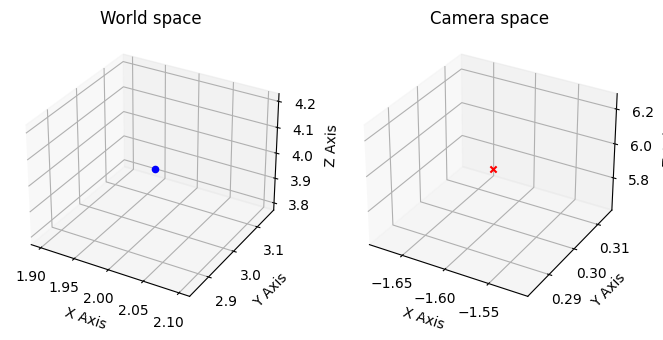

In [ ]:
# TODO: visualize the object's position in the world space and the camera space.
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_title("World space")
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_title("Camera space")
ax1.scatter(*object_position_world, color='blue', marker='o')
ax2.scatter(*object_position_camera, color='red', marker='x')
ax1.set_xlabel("X Axis")
ax1.set_ylabel("Y Axis")
ax1.set_zlabel("Z Axis")
ax2.set_xlabel("X Axis")
ax2.set_ylabel("Y Axis")
ax2.set_zlabel("Z Axis")
plt.show()

In [ ]:
object_position_camera

array([-1.5980761 ,  0.29903805,  5.946152  ], dtype=float32)